5. We now want to build a social graph where each node corresponds to a hashtag and an edge between hashtag A and hashtag B indicates that there is at least one tweet which contains both hashtag A and hashtag B. Implement a python program that allows you to identify hashtags from Tweet content message and generate the above social network graph.

In [21]:
import pandas as pd
import ast

hashtags = ['ukrainewar', 'war', 'army', 'military', 'kiev', 'ua', 'specialforces', 'donbass', 'donbasswar', 'warukraine', 'russia', 'donetsk', 'soldiers', 'ukrainenews', 'odessa', 'ukrainianarmy', 'lviv', 'victory', 'nato', 'kyiv', 'militaryukraine']
tweets = pd.read_csv('tweets.csv')

dictOfhashtags = { i : [] for i in hashtags }
list_of_matches = []

for index, row in tweets.iterrows():
    list_of_matches.append(set([hashtag_tweet.lower() for hashtag_tweet in ast.literal_eval(row.loc['hashtags'])]).intersection(hashtags))
        


In [22]:
print(list_of_matches)

[{'ukrainewar'}, {'russia'}, {'nato'}, {'ua'}, {'russia'}, {'odessa'}, {'russia'}, {'nato'}, {'russia'}, {'russia'}, {'russia'}, {'ua'}, {'ua'}, {'russia'}, {'nato'}, {'russia', 'ukrainewar'}, {'nato'}, {'russia'}, {'ua'}, {'russia'}, {'nato'}, {'russia', 'ukrainewar'}, {'ukrainewar'}, {'russia'}, {'russia', 'donbass', 'nato'}, {'nato'}, {'ua'}, {'military'}, {'ua'}, {'odessa'}, {'army'}, {'russia'}, {'russia'}, {'russia'}, {'war'}, {'ua', 'kiev'}, {'russia'}, {'nato'}, {'nato'}, {'russia'}, {'nato'}, {'ukrainewar'}, {'nato'}, {'military'}, {'nato'}, {'russia', 'ukrainewar'}, {'russia'}, {'russia'}, {'nato'}, {'ua'}, {'russia'}, {'lviv', 'russia', 'war'}, {'war'}, {'ua'}, {'military'}, {'ua'}, {'russia'}, {'russia'}, {'ukrainewar'}, {'russia', 'donbass'}, {'ua'}, {'ua'}, {'russia'}, {'russia'}, {'odessa'}, {'russia'}, {'war'}, {'russia'}, {'russia'}, {'russia'}, {'war'}, {'russia', 'donbass'}, {'russia', 'kyiv', 'donetsk', 'ukrainewar'}, {'russia'}, {'ukrainewar'}, {'russia'}, {'nato'}

In [23]:
list_of_matches_with_more_than_one = []
for element in list_of_matches:
    if len(element) >= 2:
        list_of_matches_with_more_than_one.append(element)

In [24]:
print(list_of_matches_with_more_than_one)

[{'russia', 'ukrainewar'}, {'russia', 'ukrainewar'}, {'russia', 'donbass', 'nato'}, {'ua', 'kiev'}, {'russia', 'ukrainewar'}, {'lviv', 'russia', 'war'}, {'russia', 'donbass'}, {'russia', 'donbass'}, {'russia', 'kyiv', 'donetsk', 'ukrainewar'}, {'russia', 'kyiv'}, {'russia', 'military'}, {'russia', 'odessa'}, {'russia', 'kyiv'}, {'nato', 'ukrainewar'}, {'army', 'military'}, {'russia', 'kyiv', 'nato'}, {'russia', 'kyiv'}, {'russia', 'nato'}, {'russia', 'ukrainewar'}, {'russia', 'ukrainewar'}, {'russia', 'nato', 'war', 'ukrainewar'}, {'russia', 'kyiv', 'nato'}, {'russia', 'kyiv', 'war'}, {'russia', 'nato'}, {'russia', 'kyiv', 'war'}, {'russia', 'kyiv', 'nato'}, {'russia', 'odessa'}, {'russia', 'ukrainewar'}, {'russia', 'nato'}, {'russia', 'kyiv', 'war'}, {'russia', 'kyiv', 'nato'}, {'russia', 'kyiv'}, {'russia', 'nato'}, {'kyiv', 'nato'}, {'russia', 'odessa'}, {'lviv', 'donbass', 'kiev'}, {'russia', 'kyiv', 'nato'}, {'war', 'odessa'}, {'military', 'war'}, {'russia', 'kiev'}, {'russia', 'k

In [25]:
import itertools

combis = []

for element in list_of_matches_with_more_than_one:
    combis.append(list(itertools.combinations(element, 2)))

#print(combis)

In [26]:
edges = []
for l in combis:
    for t in l:
        edge = (hashtags.index(t[0]),hashtags.index(t[1]))
        edge = sorted (edge)
        edge = tuple(edge)
        if edge not in edges:
            edges.append(edge)

print(edges)

[(0, 10), (7, 10), (10, 18), (7, 18), (4, 5), (10, 16), (1, 16), (1, 10), (10, 19), (10, 11), (11, 19), (0, 19), (0, 11), (3, 10), (10, 14), (0, 18), (2, 3), (18, 19), (1, 18), (0, 1), (1, 19), (7, 16), (4, 16), (4, 7), (1, 14), (1, 3), (4, 10), (7, 11), (4, 14), (0, 14), (0, 4), (7, 14), (11, 18), (4, 11), (11, 14), (4, 18), (14, 18), (4, 19), (16, 19), (10, 15), (3, 18), (14, 19), (10, 12), (12, 18), (0, 3), (3, 4), (1, 4), (0, 15), (1, 5), (9, 10), (1, 9), (0, 9), (7, 19), (7, 8), (11, 16), (0, 16), (0, 7), (1, 7), (14, 16), (0, 5), (16, 18), (1, 11), (2, 12), (2, 6), (8, 10), (1, 12), (1, 2), (0, 2), (9, 15), (8, 11), (5, 11), (5, 18), (5, 10), (5, 16), (5, 14), (5, 19)]


In [27]:
import networkx as nx
G = nx.Graph()

In [28]:
nodes = []
for hashtag in hashtags:
    nodes.append((hashtags.index(hashtag), hashtag))

print(nodes)

[(0, 'ukrainewar'), (1, 'war'), (2, 'army'), (3, 'military'), (4, 'kiev'), (5, 'ua'), (6, 'specialforces'), (7, 'donbass'), (8, 'donbasswar'), (9, 'warukraine'), (10, 'russia'), (11, 'donetsk'), (12, 'soldiers'), (13, 'ukrainenews'), (14, 'odessa'), (15, 'ukrainianarmy'), (16, 'lviv'), (17, 'victory'), (18, 'nato'), (19, 'kyiv'), (20, 'militaryukraine')]


In [37]:
G.add_nodes_from(nodes)
G.add_edges_from(edges)

NetworkXError: Node (0, 'ukrainewar') has no position.

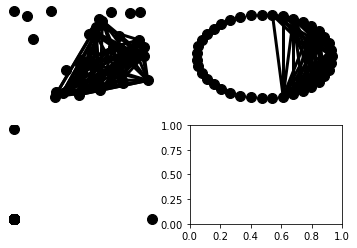

In [39]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

NetworkXError: Node (0, 'ukrainewar') has no position.

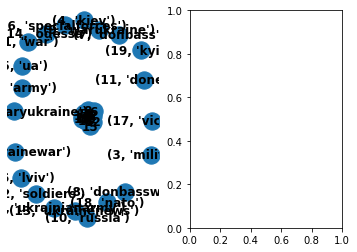

In [38]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')